# Introducción

Este notebook realiza el análisis exploratorio, limpieza y preparación del dataset de URLs de phishing en el contexto español, como primer paso del pipeline de modelado. 

### Contexto y limitaciones
El dataset original procede de PhishTank y se ha filtrado usando palabras clave asociadas a entidades españolas (bancos, telcos, administración, etc.).  
Este método **no garantiza** que todas las URLs sean campañas realmente dirigidas a España:  
- Pueden aparecer campañas internacionales o falsos positivos.
- El volumen final de datos locales es bajo, lo que limita el potencial de un modelo específico para España.

Aun así, el proceso sirve como primer acercamiento práctico y como base para ampliar y mejorar la recogida de datos en el futuro.

En futuros trabajos, se ampliará la recopilación y validación de datos para lograr una mayor adaptación.

# HH

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', 50)
%matplotlib inline

## 2. Carga y exploración inicial de los datos

Cargamos el dataset filtrado de PhishTank y revisamos su estructura, tamaño y primeras filas para entender su contenido y posibles problemas iniciales.


In [3]:
# Carga de datos PhishTank ES
try:
    df = pd.read_csv('phishtank_es.csv')
    print('Datos cargados correctamente.')
except FileNotFoundError:
    print('Archivo no encontrado. Verifica el nombre o la ubicación.')


Datos cargados correctamente.


### Descripción del Dataset

En este análisis utilizo el dataset 'phishtank_es.csv', extraído de Phishtank.

Fecha de descarga: 11/07/2025


In [4]:
# Ver las primeras filas #
print(df.head())

   phish_id                                                url  \
0   9152757  https://interiakastliveresvbrokers.com/?token=...   
1   9152752                    http://accessrevoke1.vercel.app   
2   9152753                  https://accessrevoke1.vercel.app/   
3   9152737       https://interiakastliverescbrokers.com/login   
4   9152736  https://interiakastliverescbrokers.com/?token=...   

                                    phish_detail_url  \
0  http://www.phishtank.com/phish_detail.php?phis...   
1  http://www.phishtank.com/phish_detail.php?phis...   
2  http://www.phishtank.com/phish_detail.php?phis...   
3  http://www.phishtank.com/phish_detail.php?phis...   
4  http://www.phishtank.com/phish_detail.php?phis...   

             submission_time verified          verification_time online target  
0  2025-07-11T09:46:33+00:00      yes  2025-07-11T09:52:02+00:00    yes  Other  
1  2025-07-11T09:09:45+00:00      yes  2025-07-11T09:21:34+00:00    yes  Other  
2  2025-07-11T09:09:45+

In [5]:
# Ver las columnas presentes y tipos de datos #
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12689 entries, 0 to 12688
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   phish_id           12689 non-null  int64 
 1   url                12689 non-null  object
 2   phish_detail_url   12689 non-null  object
 3   submission_time    12689 non-null  object
 4   verified           12689 non-null  object
 5   verification_time  12689 non-null  object
 6   online             12689 non-null  object
 7   target             12689 non-null  object
dtypes: int64(1), object(7)
memory usage: 793.2+ KB
None


In [6]:
# Ver el número de filas y columnas #
print(df.shape)

(12689, 8)


## 3. Limpieza de datos

Buscamos y, en su caso, eliminamos URLs duplicadas para evitar que el modelo aprenda varias veces el mismo patrón de phishing.


In [7]:
# Número de datos duplicados por URL #
print('Duplicados por url:', df['url'].duplicated().sum())

Duplicados por url: 0


### Análisis y filtrado por veracidad

Inspeccionamos el campo `verified` para garantizar que solo usamos URLs confirmadas como phishing real.  
Se filtran las filas para quedarnos únicamente con aquellas con `verified = 'yes'`.


In [8]:
# Seleccionamos las URLs que han sido verificadas como phishing real #
print(df['verified'].value_counts())

verified
yes    12689
Name: count, dtype: int64


### Análisis y decisión sobre las columnas útiles

Decidimos qué columnas conservar para el modelado (normalmente solo `url` y, en el futuro, `label`).  
El resto de columnas se eliminan para simplificar el dataset y evitar ruido innecesario.


In [9]:
# Copiamos únicamente la columnad e "url" #
df_model = df[['url']].copy()

In [10]:
# Añadimos la columna "label", más adelante se añadirán url's legítimas #
df_model['label'] = 1

In [11]:
df_model.head()

,url,label
0,https://interiakastliveresvbrokers.com/?token=...,1
1,http://accessrevoke1.vercel.app,1
2,https://accessrevoke1.vercel.app/,1
3,https://interiakastliverescbrokers.com/login,1
4,https://interiakastliverescbrokers.com/?token=...,1


###  Guardado del dataset limpio

Guardamos el dataset final limpio y reducido en la carpeta `/data/processed/`, listo para su uso en el pipeline de entrenamiento y validación de modelos.


In [12]:
# Guardamos el dataset limpio #
df_model.to_csv('../data/processed/phishtank_es_limpio.csv', index=False)


In [13]:
#Mostramos 50 ejemplos para comprobar su pertenecencia al contexto español#
muestra = df.sample(50, random_state = 42)
print(muestra['url'])

6929     https://sites.google.com/view/asistenciabanrur...
5440     https://docs.google.com/presentation/d/e/2PACX...
4601     https://docs.google.com/presentation/d/1JtKtd3...
3128     https://docs.google.com/presentation/d/e/2PACX...
3160        https://my-business-105409-104969.square.site/
8861     https://new.express.adobe.com/webpage/6LnyPvAz...
7104     https://docs.google.com/presentation/d/e/2PACX...
9447     https://docs.google.com/presentation/d/e/2PACX...
3798     https://docs.google.com/presentation/d/e/2PACX...
7879     https://docs.google.com/forms/d/e/1FAIpQLSeI3B...
6571     https://docs.google.com/presentation/d/e/2PACX...
1655                      https://correoserv25.weebly.com/
7897     https://docs.google.com/presentation/d/e/2PACX...
3894     https://docs.google.com/presentation/d/e/2PACX...
538      http://86324.quickfixpm.com/17230/verify.php?c...
6860           https://cpanel-webmail-bt3b20ettx.pages.dev
2167            https://www.grwebsites.com/free/urheje/b

## Análisis esploratorio

**Filtrado avanzado por entidades españolas**

Para evitar falsos positivos debidos a la presencia del `.es`, se eliminó de la lista de palabras clave.  
El filtrado ahora solo considera referencias explícitas a bancos, operadores de telefonía, y organismos/servicios españoles, lo que reduce drásticamente el número de URLs seleccionadas pero incrementa la especificidad y la calidad del dataset para el contexto nacional.


In [14]:
#Aplicamos el filtro de palabras clave#
palabras_clave = [
    # Bancos
    'caixabank', 'bbva', 'santander', 'bankinter', 'sabadell', 'unicaja', 'openbank', 'iberCaja',
    # Telcos
    'orange', 'movistar', 'vodafone', 'jazztel', 'masmovil', 'yoigo', 'telecable', 'lowi', 'o2',
    # Servicios y administración
    'correos', 'sepe', 'mapfre', 'aeat', 'renfe', 'iberdrola', 'suma', 'factura', 'dgt', 'hacienda', 'seg-social', 'salud', 'inss'
]

mask = df['url'].str.contains('|'.join(palabras_clave), case = False, na = False)
print(mask.sum()) #Número de urls que cumplen el filtro#
df_filtrado = df[mask]
print(df_filtrado.head(10))

#Seleccionamos las columnas necesarias
df_util = df_filtrado[['url']].copy()
df_util['label'] = 1 #Son todas phishing#

# 3. Guardamos el DataFrame limpio
df_util.to_csv('../data/processed/phishing_espanol_estricto.csv', index=False)


426
     phish_id                                                url  \
7     9152687        http://allegrolokalnie.5483o23-3828n12.rest   
51    9152177  https://pettenonxtrader.com.br/painel/includes...   
81    9151754  https://docs.google.com/presentation/d/e/2PACX...   
236   9149334     https://prevenciones-de-bloqueo2025.weebly.com   
280   9148054  https://docs.google.com/presentation/d/e/2PACX...   
437   9145504            https://facturation-autoroutes.com/pay/   
492   9144146  https://idt.oc.cuenta.lonos-facturacion-1and1....   
532   9143219  https://idt.oc.cuenta.lonos-facturacion-1and1....   
576   9141721  https://kerstinc.org/es/?facturacion=314735738...   
632   9140538              https://orangeinfos.godaddysites.com/   

                                      phish_detail_url  \
7    http://www.phishtank.com/phish_detail.php?phis...   
51   http://www.phishtank.com/phish_detail.php?phis...   
81   http://www.phishtank.com/phish_detail.php?phis...   
236  http://www

### Resumen del filtrado y análisis de resultados
Tras aplicar el filtrado por palabras clave, el número de URLs se ha reducido considerablemente.

A continuación se presenta una gráfica con el número de URLs para cada entidad.

In [15]:
conteos = {}
for palabra in palabras_clave:
    n = df[df['url'].str.contains(palabra, case=False, na=False)].shape[0]
    conteos[palabra] = n
    print(f"{palabra}: {n} URLs")


caixabank: 2 URLs
bbva: 6 URLs
santander: 2 URLs
bankinter: 0 URLs
sabadell: 0 URLs
unicaja: 0 URLs
openbank: 0 URLs
iberCaja: 0 URLs
orange: 76 URLs
movistar: 0 URLs
vodafone: 0 URLs
jazztel: 0 URLs
masmovil: 0 URLs
yoigo: 0 URLs
telecable: 0 URLs
lowi: 0 URLs
o2: 270 URLs
correos: 18 URLs
sepe: 3 URLs
mapfre: 0 URLs
aeat: 0 URLs
renfe: 0 URLs
iberdrola: 0 URLs
suma: 1 URLs
factura: 7 URLs
dgt: 40 URLs
hacienda: 0 URLs
seg-social: 0 URLs
salud: 1 URLs
inss: 0 URLs


## Visualización

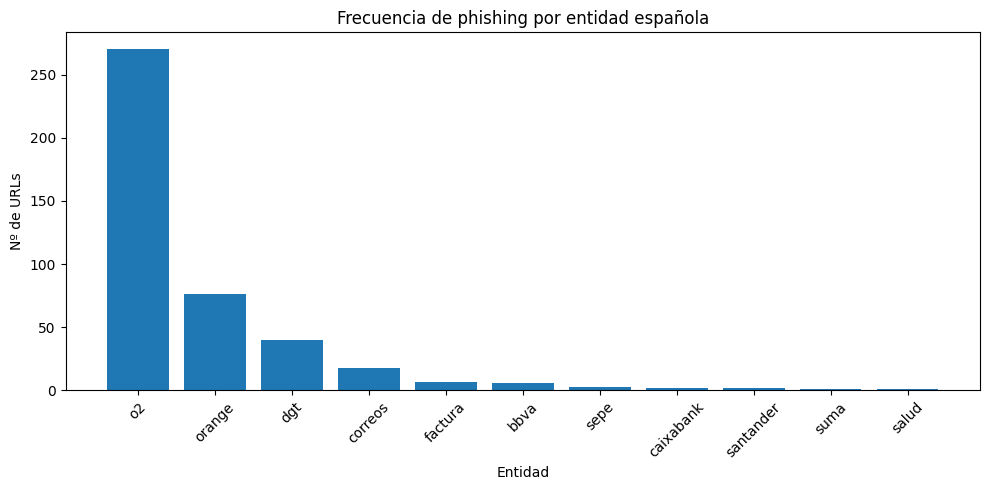

In [16]:
# Gráfico de barras para frecuencia de entidades
import matplotlib.pyplot as plt

df_empresas = pd.DataFrame(list(conteos.items()), columns=['Entidad', 'Nº URLs'])
df_empresas = df_empresas[df_empresas['Nº URLs'] > 0].sort_values('Nº URLs', ascending=False)

plt.figure(figsize=(10,5))
plt.bar(df_empresas['Entidad'], df_empresas['Nº URLs'])
plt.xticks(rotation=45)
plt.title('Frecuencia de phishing por entidad española')
plt.xlabel('Entidad')
plt.ylabel('Nº de URLs')
plt.tight_layout()
plt.show()


> Se observa que entidades como Orange y O2 concentran la mayor parte de los casos detectados, mientras que la mayoría de bancos y otros servicios apenas tienen presencia.
> Muchas de las URLs detectadas con la palabra clave "o2" pueden corresponder a campañas internacionales o estar dirigidas a usuarios fuera del contexto español. 
> Esto pone de manifiesto la escasez de datos específicamente españoles y la necesidad de buscar fuentes adicionales para futuras mejoras.


## Conclusiones

A pesar del filtrado por palabras clave, el número de URLs específicamente dirigidas a entidades españolas es muy reducido. Esto limita la capacidad del modelo para aprender patrones verdaderamente adaptados al contexto nacional. En futuros desarrollos, se recomienda:
- Buscar feeds o repositorios españoles de phishing (INCIBE, CERT, foros, etc.).
- Automatizar la recolección de campañas dirigidas a empresas/servicios en España.
- Implementar revisión manual o colaborativa para anotar casos dudosos.
